In [1]:
from CoolProp.CoolProp import PropsSI
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Function(T_evp, ref1, ref2):
    Qevp = 10000
    Tevp = T_evp + 273.16
    Tcond = 45 + 273.16
    T_LTC = -5 + 273.16
    Tsuperheat = 10
    Tsubcool = 10
    effcompL = .8

    T1 = Tevp + Tsuperheat   #Superheating
    P1 = PropsSI('P', 'T', Tevp, 'Q', 1, ref1)
    H1 = PropsSI('H', 'P', P1, 'T', T1, ref1)
    S1 = PropsSI('S', 'P', P1, 'T', T1, ref1)

    T3 = T_LTC
    T3sub = T_LTC - Tsubcool       #Subcooling

    P3 = PropsSI('P', 'T', T3, 'Q', 0, ref1)
    H3 = PropsSI('H', 'T', T3, 'Q', 0, ref1)
    S3 = PropsSI('S', 'T', T3, 'Q', 0, ref1)

    P3sub = PropsSI('P', 'T', T3sub, 'Q', 0, ref1)
    H3sub = PropsSI('H', 'T', T3sub, 'Q', 0, ref1)
    S3sub = PropsSI('S', 'T', T3sub, 'Q', 0, ref1)


    H4sub = H3sub
    T4sub = Tevp
    P4sub = P1
    S4sub = PropsSI('S', 'P', P4sub, 'H', H4sub, ref1)

    P2 = P3
    S2s = S1
    H2s = PropsSI('H', 'P', P2, 'S', S2s, ref1)
    H2 = H1 + ((H2s - H1) / effcompL)
    S2 = PropsSI('S', 'P', P2, 'H', H2, ref1)
    T2 = PropsSI('T', 'P', P2, 'H', H2, ref1)



    Tevp_HTC = T_LTC - 5
    T5 = Tevp_HTC + Tsuperheat   #Superheating    
    P5 = PropsSI('P', 'T', Tevp_HTC, 'Q', 1, ref2)
    H5 = PropsSI('H', 'P', P5, 'T', T5, ref2)
    S5 = PropsSI('S', 'P', P5, 'T', T5, ref2)

    T7 = Tcond
    T7sub = Tcond - Tsubcool       #Subcooling

    P7 = PropsSI('P', 'T', T7, 'Q', 0, ref2)
    H7 = PropsSI('H', 'T', T7, 'Q', 0, ref2)
    S7 = PropsSI('S', 'T', T7, 'Q', 0, ref2)
    P7sub = PropsSI('P', 'T', T7sub, 'Q', 0, ref2)
    H7sub = PropsSI('H', 'T', T7sub, 'Q', 0, ref2)
    S7sub = PropsSI('S', 'T', T7sub, 'Q', 0, ref2)


    H8sub = H7sub
    T8sub = Tevp
    P8sub = P5
    S8sub = PropsSI('S', 'P', P8sub, 'H', H8sub, ref2)

    P6 = P7
    S6s = S5
    H6s = PropsSI('H', 'P', P6, 'S', S6s, ref2)
    H6 = H5 + ((H6s - H5) / effcompL)
    S6 = PropsSI('S', 'P', P6, 'H', H6, ref2)
    T6 = PropsSI('T', 'P', P6, 'H', H6, ref2)

    # print("Temperature     ", "Pressure     ", "Enthalpy     ", "Entropy")
    # print(T5, " ", P5, " ", H5, " ", S5)
    # print(T6, " ", P6, " ", H6, " ", S6)
    # print(T7, " ", P7, " ", H7, " ", S7)
    # print(T7sub, " ", P7sub, " ", H7sub, " ", S7sub)
    # print(T8sub, " ", P8sub, " ", H8sub, " ", S8sub)



    #Flow Rates:
    #LTC
    mLTC = Qevp / (H1 - H4sub)

    #HTC
    mHTC = (mLTC * (H2 - H3)) / (H5 - H8sub)

    #Compressor Work:
    #LTC
    wLTC = mLTC * (H2 - H1)

    #HTC
    wHTC = mHTC * (H6 - H5)

    #Total Compressor Work
    W_total = wLTC + wHTC

    #COP
    COP = (Qevp / W_total)
    COPL = Qevp / wLTC
    COPH = (mHTC * (H5 - H8sub)) / (wHTC)
    
    
    #Exergy Analysis
    Ta = 25 + 273 #ambient Temperature
    X_evp = Ta * ((mLTC * (S1 - S4sub)) - (Qevp/(Tevp + 5)))
    X_compl = Ta * mLTC * (S2 - S1)
    X_CHX = Ta * ((mLTC * (S3sub - S2)) + (mHTC * (S5 - S8sub)))
    X_EV1 = Ta * mLTC * (S4sub - S3sub)
#     X_comph = Ta * mHTC * (S6 - S5)
    X_comph = Ta * mHTC * (S5 - S6)
#     Qcond = mHTC * (H7sub - H6)
    Qcond = mHTC * (H6 - H7sub)
    X_cond = Ta * ((mHTC * (S7sub - S6)) + (Qcond/Ta))
    X_EV2 = Ta * mHTC * (S8sub - S7sub)
    X_total = X_compl + X_comph + X_CHX + X_EV1 + X_EV2 + X_evp + X_cond 
    exergy_eff = (1 - X_total/W_total)

    # print(COP, " ", COPL, " ", COPH, " ", W_total)

    return COP, W_total, X_total, exergy_eff

In [3]:
# T_LTC = [-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25]
T_evp = [-55, -50, -45, -40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30]

COP = []
X_total = []
Exergy_eff = []
W_total = []

for i in T_evp:
    a, b, c, d= Function(i, "R744", "R1234ze(E)")
    COP.append(a)
    W_total.append(b)
    X_total.append(c)
    Exergy_eff.append(d)

In [4]:
COP

[1.2675630930113684,
 1.393097993005337,
 1.531577459791845,
 1.684886803306327,
 1.8552802018089574,
 2.0454666048543584,
 2.258718366276292,
 2.499009195897331,
 2.7711892820790567,
 3.08120620644014,
 3.4363793185543745,
 3.8457317051674957,
 4.320377800270569,
 4.876741263643115,
 5.546557233541113,
 6.368173767769565,
 7.398850869522623,
 8.734228821464574]

In [5]:
W_total

[7889.15364855161,
 7178.245931161635,
 6529.215963624255,
 5935.1168163799275,
 5390.021404987603,
 4888.860065604455,
 4427.2894528616835,
 4001.5859150967444,
 3608.558991141017,
 3245.482233256132,
 2910.0396297946604,
 2600.2853986311725,
 2314.6123932434193,
 2050.5496312776722,
 1802.9201861522406,
 1570.3089087505336,
 1351.5612324600352,
 1144.9207714165632]

In [6]:
Exergy_eff

[0.7177235118326198,
 0.7386783617994587,
 0.7598362781598805,
 0.7812856714090993,
 0.8031254990823038,
 0.8254663121011987,
 0.8484313577390654,
 0.8721577760369573,
 0.8967975939463815,
 0.9225178897355286,
 0.949499006780362,
 0.9779290717150543,
 1.0079929362950444,
 1.0403993832547582,
 1.077830242541081,
 1.1224683909636892,
 1.1776468019403645,
 1.2496550302727933]

In [7]:
for i in X_total:
    print("%.2f"%(i))

2226.92
1875.83
1568.08
1298.10
1061.16
853.27
671.04
511.57
372.41
251.47
146.96
57.39
-18.50
-82.84
-140.32
-192.31
-240.10
-285.84


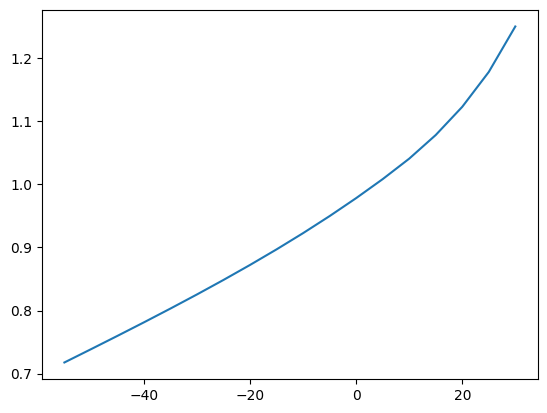

In [8]:
plt.plot(T_evp, Exergy_eff)